In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn .metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import accuracy_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [4]:
#exploring the data

In [5]:
data.shape , data_test.shape

((100000, 28), (50000, 27))

In [6]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
missing_values = data.isnull().sum()

In [9]:
missing_values

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

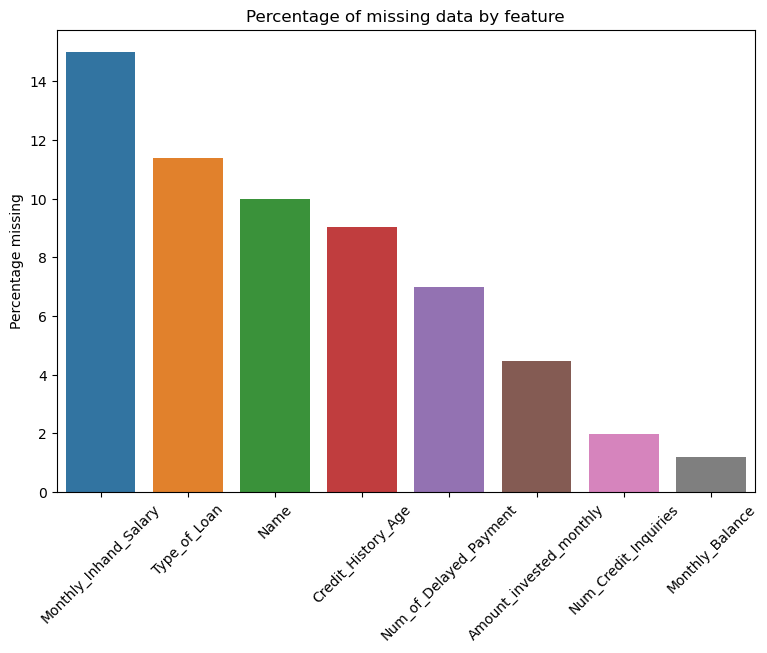

In [10]:
data_na = (missing_values / len(data)) * 100

# drop columns without missing values 
data_na = data_na.drop(data_na[data_na == 0].index)

#sort
data_na=data_na.sort_values(ascending=False)

# create plot
f, ax = plt.subplots(figsize=(9, 6))
plt.xticks(rotation=45)
sns.barplot(x=data_na.index, y=data_na)
ax.set(title='Percentage of missing data by feature', ylabel='Percentage missing')
plt.show()

In [11]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [12]:
data.shape

(100000, 28)

In [13]:
data_test.shape

(50000, 27)

In [14]:
object_columns=list(data.select_dtypes(include='object').columns)


In [15]:
data[object_columns].head()



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [16]:
# change data type of columns with 'object' datatype

In [17]:
data = data.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [18]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [20]:
data['ID'] = data.ID.apply(lambda x: int(x, 16))

In [21]:
data['Customer_ID']= data.Customer_ID.apply(lambda x: int(x[4:], 16))

In [22]:
data['Age'] = data.Age.astype(int)        


In [23]:
data['SSN'] = data.SSN.apply(lambda x: x if x is np.NaN else float(str(x).replace('-', ''))).astype(float)


In [24]:
data['Annual_Income'] = data.Annual_Income.astype(float)


In [25]:
data['Num_of_Loan'] = data.Num_of_Loan.astype(int) 


In [26]:
data['Num_of_Delayed_Payment'] = data.Num_of_Delayed_Payment.astype(float)

In [27]:
data['Changed_Credit_Limit'] = data.Changed_Credit_Limit.astype(float)

In [28]:
data['Outstanding_Debt'] = data.Outstanding_Debt.astype(float)

In [29]:
data['Amount_invested_monthly'] = data.Amount_invested_monthly.astype(float)


In [30]:
data['Monthly_Balance'] = data.Monthly_Balance.astype(float)

In [31]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return num1*12+num2
    else:
        return x

In [32]:
data['Credit_History_Age'] = data.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [33]:
object_columns=list(data.select_dtypes(include='object').columns)
data[object_columns].head()

,Month,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,No,High_spent_Small_value_payments,Good
1,February,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,March,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,April,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,May,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


In [34]:
num_columns = list(data.select_dtypes(include=["int64","float64"]).columns)
data[num_columns].head()

,ID,Customer_ID,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,5634,3392,821000265.0,19114.12,1824.843333,3,4,3,3,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,5635,3392,821000265.0,19114.12,NaN,3,4,3,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.280222,284.629162
2,5636,3392,821000265.0,19114.12,NaN,3,4,3,3,7.0,NaN,4.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,5637,3392,821000265.0,19114.12,NaN,3,4,3,5,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,5638,3392,821000265.0,19114.12,1824.843333,3,4,3,6,NaN,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231


In [35]:
# missing data

In [36]:
def columns_with_missing_values(DataFrame):
    missing_columns=(DataFrame.isnull().sum())
    return missing_columns[missing_columns > 0]
columns_with_missing_values(data)

Name                        9985
SSN                         5572
Occupation                  7062
Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Credit_Mix                 20195
Credit_History_Age          9030
Amount_invested_monthly     4479
Payment_Behaviour           7600
Monthly_Balance             1200
dtype: int64

In [37]:
missing_columns=(data.isnull().sum())


In [38]:
miss_num_columns = list(data[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)

miss_object_columns=list(data[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)

In [39]:
# Fill NAN for every missing columns

In [40]:
miss_num_columns

['SSN',
 'Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [41]:
def Distribution2(columne,data1,i):
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Before Distribution','After Distribution']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='r').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],palette='magma').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='#2171b5').set_title(title[i])
        sns.boxplot(data=data,x=columne ,ax = ax[1],color='#2171b5').set_title(title[i])
        
    ax = np.reshape(ax, (1, 2))
    plt.tight_layout()

In [42]:
data1=data.copy()


In [43]:
#SSN
data1.drop('SSN',axis=1,inplace=True)
data1.shape

(100000, 27)

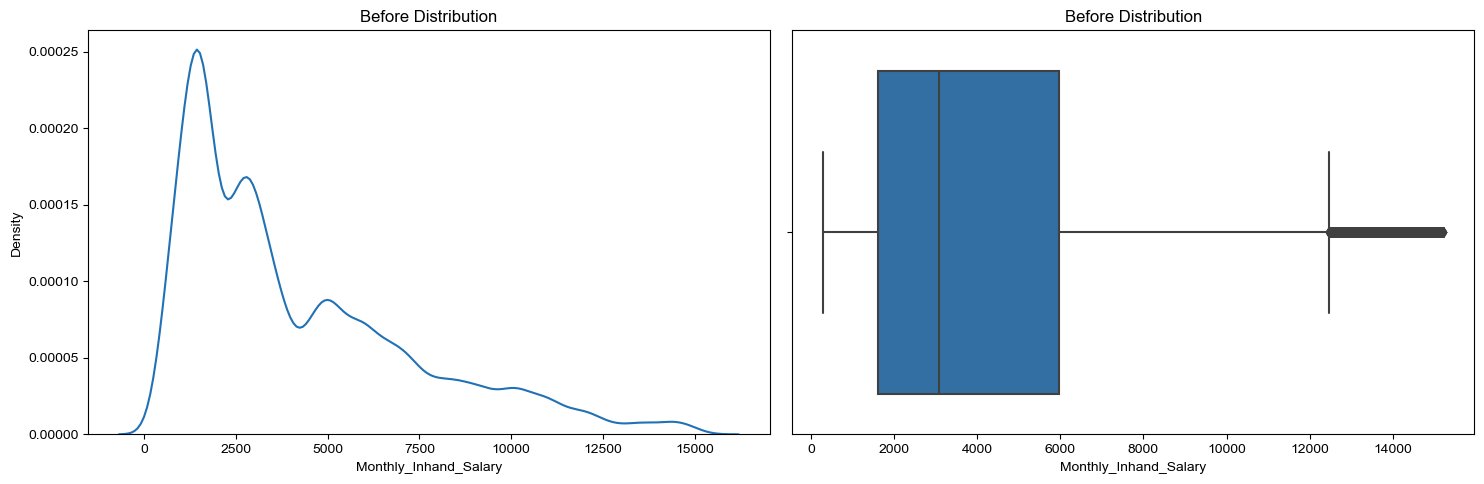

In [44]:
#Monthly inhand salary
Distribution2(columne='Monthly_Inhand_Salary',data1=data1,i=0)


In [45]:
def get_Monthly_Inhand_Salary(row):
    if pd.isnull(row['Monthly_Inhand_Salary']):
        Monthly_Inhand_Salary=(data1[data1['Customer_ID']==row['Customer_ID']]['Monthly_Inhand_Salary'].dropna()).mode()
        try:
            return Monthly_Inhand_Salary[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Inhand_Salary']

In [46]:
data1['Monthly_Inhand_Salary']=data1.apply(get_Monthly_Inhand_Salary,axis=1)


In [47]:
#Detect Outliers
print(data1[data1['Monthly_Inhand_Salary']>= 13500].shape)
data1=data1[data.Monthly_Inhand_Salary < 13500]

(1280, 27)


In [48]:
data1.shape


(83933, 27)

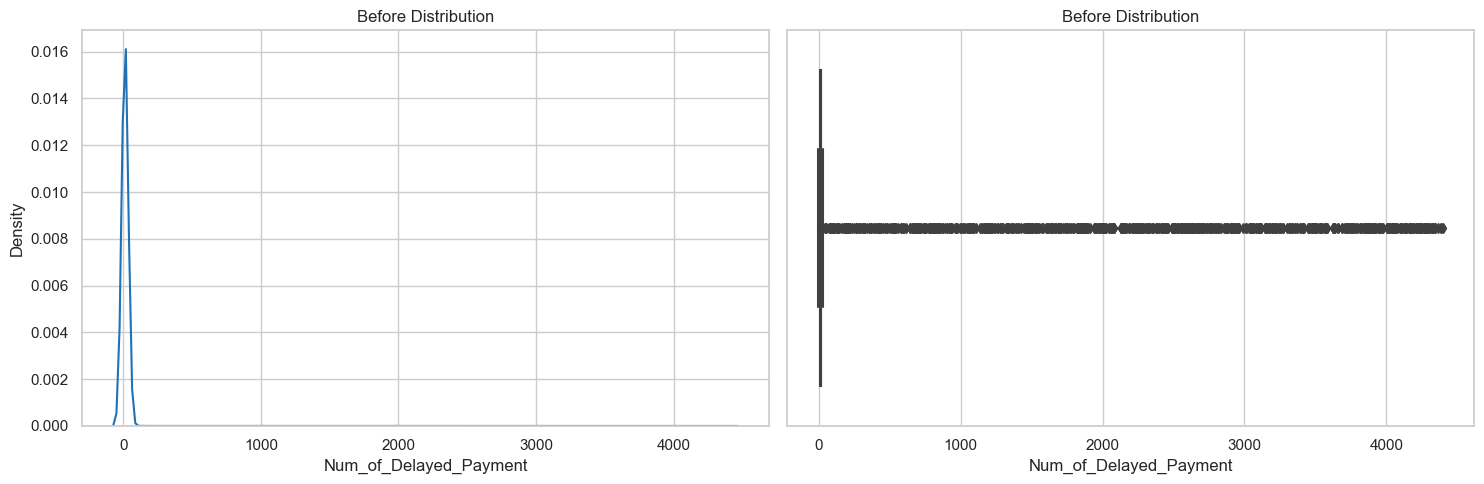

In [49]:
#Num_of_delayed_payment
Distribution2(columne='Num_of_Delayed_Payment',data1=data1,i=0)


In [50]:
def get_Num_of_Delayed_Payment(row):
    if pd.isnull(row['Num_of_Delayed_Payment']):
        Num_of_Delayed_Payment=(data1[data1['Customer_ID']==row['Customer_ID']]['Num_of_Delayed_Payment'].dropna()).mode()
        try:
            return Num_of_Delayed_Payment[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Delayed_Payment']

In [51]:
data1['Num_of_Delayed_Payment']=data1.apply(get_Num_of_Delayed_Payment,axis=1)


In [52]:
print(data1[data1['Num_of_Delayed_Payment']>=150].shape)
print(data1[data1['Num_of_Delayed_Payment'] < 0].shape)
data1=data1[data['Num_of_Delayed_Payment']< 150]
data1=data1[data['Num_of_Delayed_Payment'] >= 0]

(604, 27)
(535, 27)


In [53]:
data1.shape


(76916, 27)

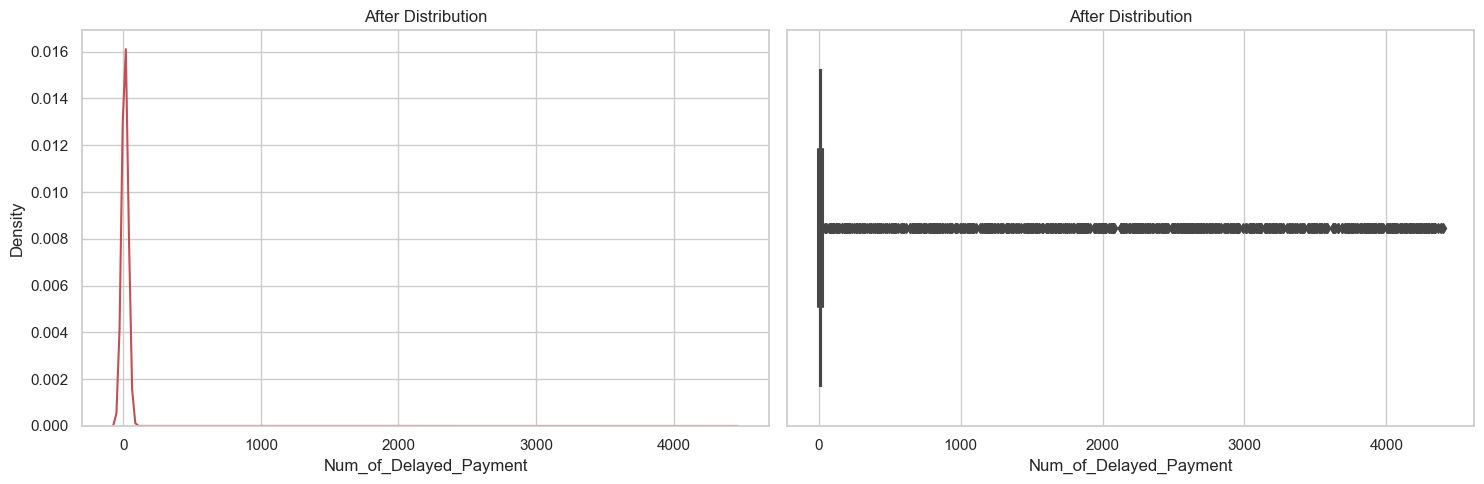

In [54]:
Distribution2(columne='Num_of_Delayed_Payment',data1=data1,i=1)


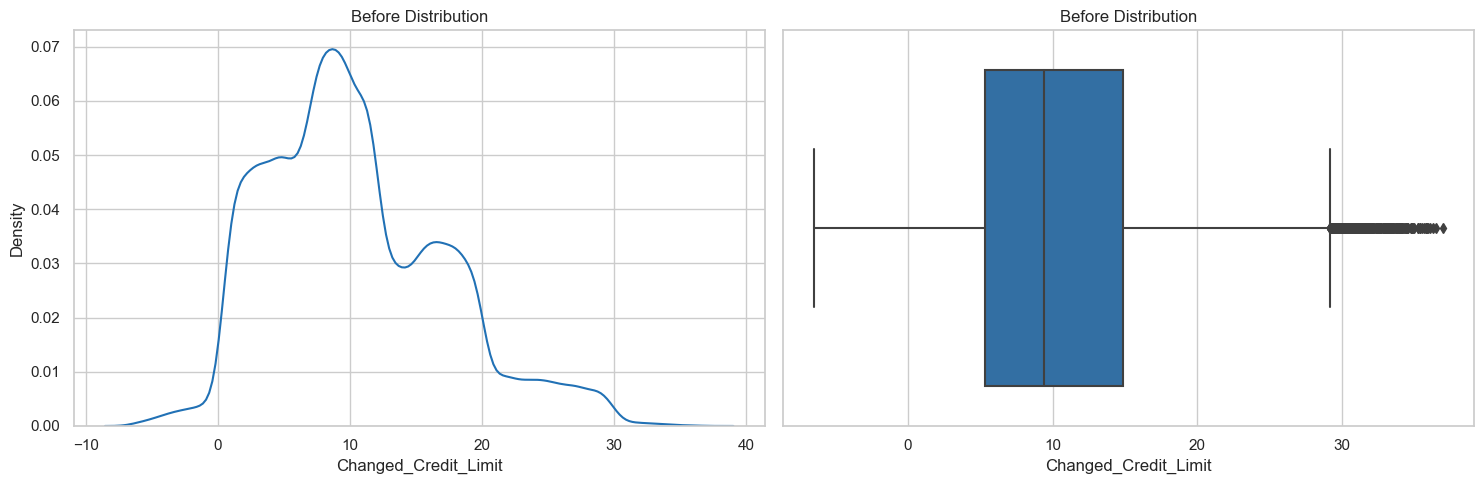

In [55]:
#Changed_Credit_Limit
Distribution2(columne='Changed_Credit_Limit',data1=data1,i=0)


In [56]:
def get_Changed_Credit_Limit(row):
    if pd.isnull(row['Changed_Credit_Limit']):
        Changed_Credit_Limit=(data1[data1['Customer_ID']==row['Customer_ID']]['Changed_Credit_Limit'].dropna()).mode()
        try:
            return Changed_Credit_Limit[0]
        except:
            return np.NaN
    else:
        return row['Changed_Credit_Limit']

In [57]:
data1['Changed_Credit_Limit']=data1.apply(get_Changed_Credit_Limit,axis=1)


In [58]:
print(data1[data1['Changed_Credit_Limit']>=30].shape)
data1=data1[data1['Changed_Credit_Limit'] < 30]

(215, 27)


In [59]:
data1.shape


(76698, 27)

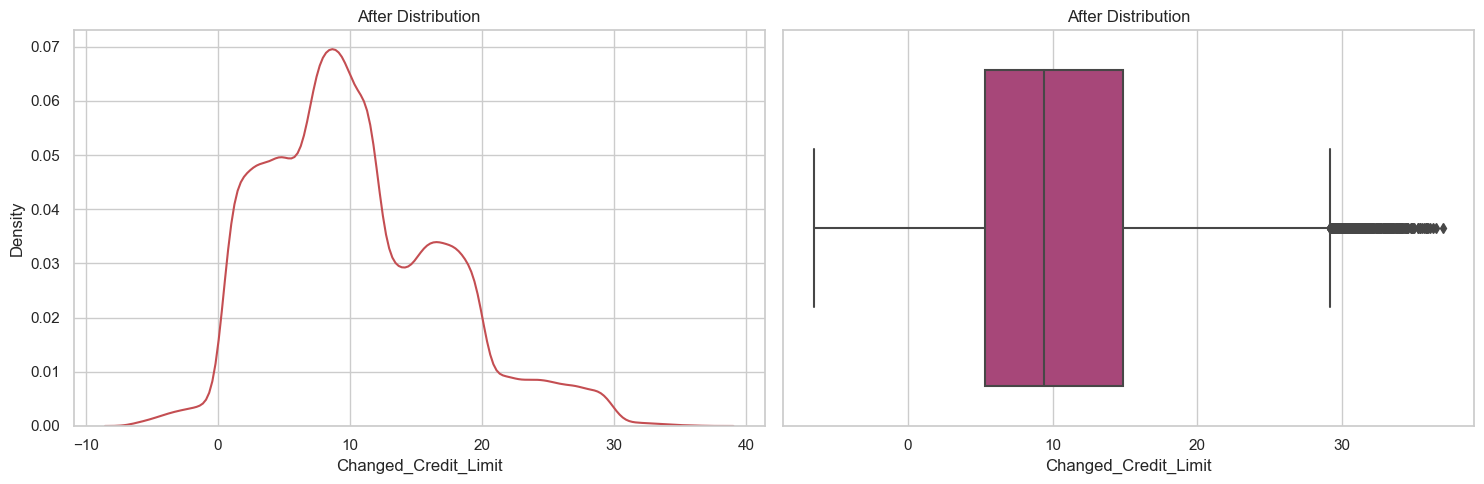

In [60]:
Distribution2(columne='Changed_Credit_Limit',data1=data1,i=1)


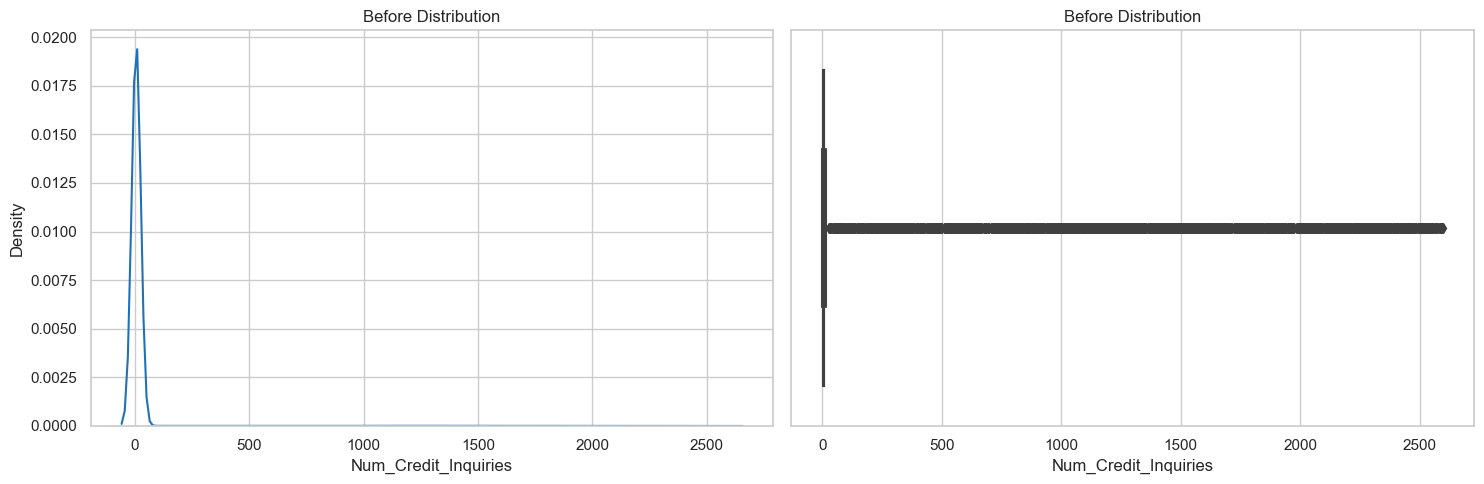

In [61]:
#Num_Credit_Inquiries
Distribution2(columne='Num_Credit_Inquiries',data1=data1,i=0)


In [62]:
def get_Num_Credit_Inquiries(row):
    if pd.isnull(row['Num_Credit_Inquiries']):
        Num_Credit_Inquiries=(data1[data1['Customer_ID']==row['Customer_ID']]['Num_Credit_Inquiries'].dropna()).mode()
        try:
            return Num_Credit_Inquiries[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Inquiries']

In [63]:
data1['Num_Credit_Inquiries']=data1.apply(get_Num_Credit_Inquiries,axis=1)


In [64]:
print(data1[data1['Num_Credit_Inquiries']>=50].shape)
data1=data1[data1['Num_Credit_Inquiries']<50]

(1245, 27)


In [65]:
data1.shape


(75453, 27)

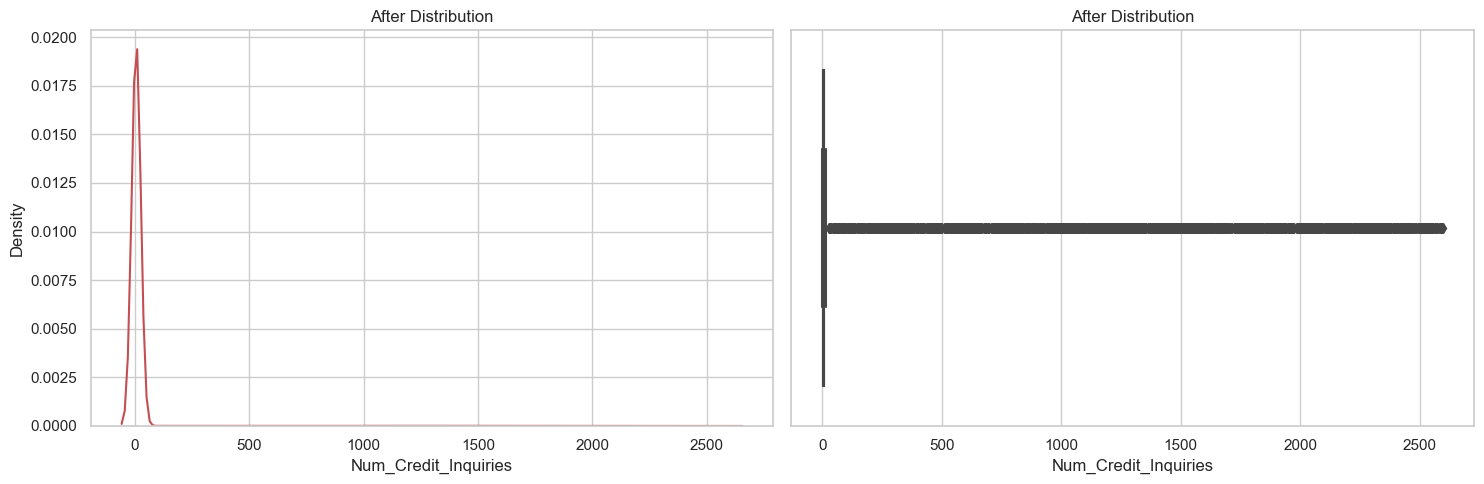

In [66]:
Distribution2(columne='Num_Credit_Inquiries',data1=data1,i=1)


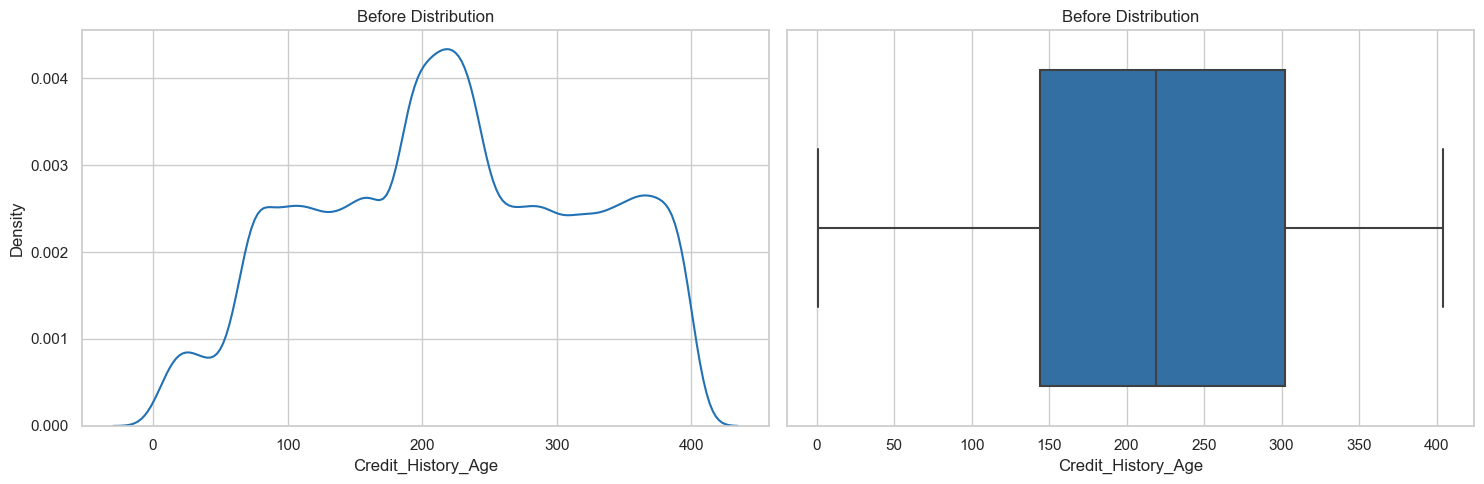

In [67]:
#Credit History Age
Distribution2(columne='Credit_History_Age',data1=data1,i=0)


In [68]:
def get_Credit_History_Age(row):
    if pd.isnull(row['Credit_History_Age']):
        Credit_History_Age=(data1[data1['Customer_ID']==row['Customer_ID']]['Credit_History_Age'].dropna()).mode()
        try:
            return Credit_History_Age[0]
        except:
            return np.NaN
    else:
        return row['Credit_History_Age']

In [69]:
data1['Credit_History_Age']=data1.apply(get_Credit_History_Age,axis=1)


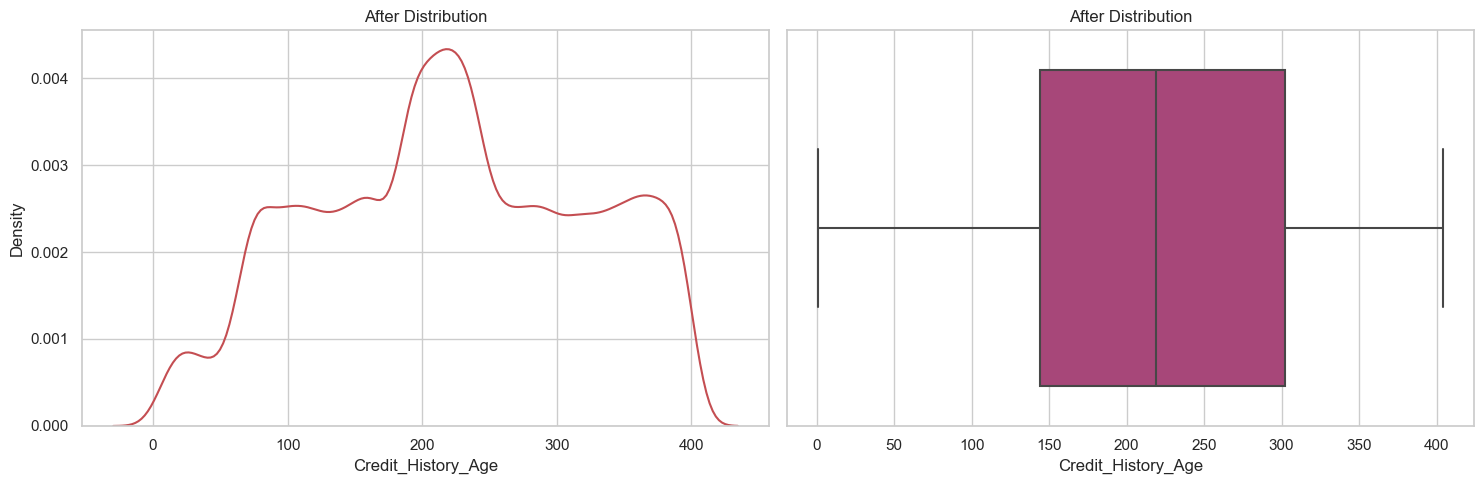

In [70]:
Distribution2(columne='Credit_History_Age',data1=data1,i=1)


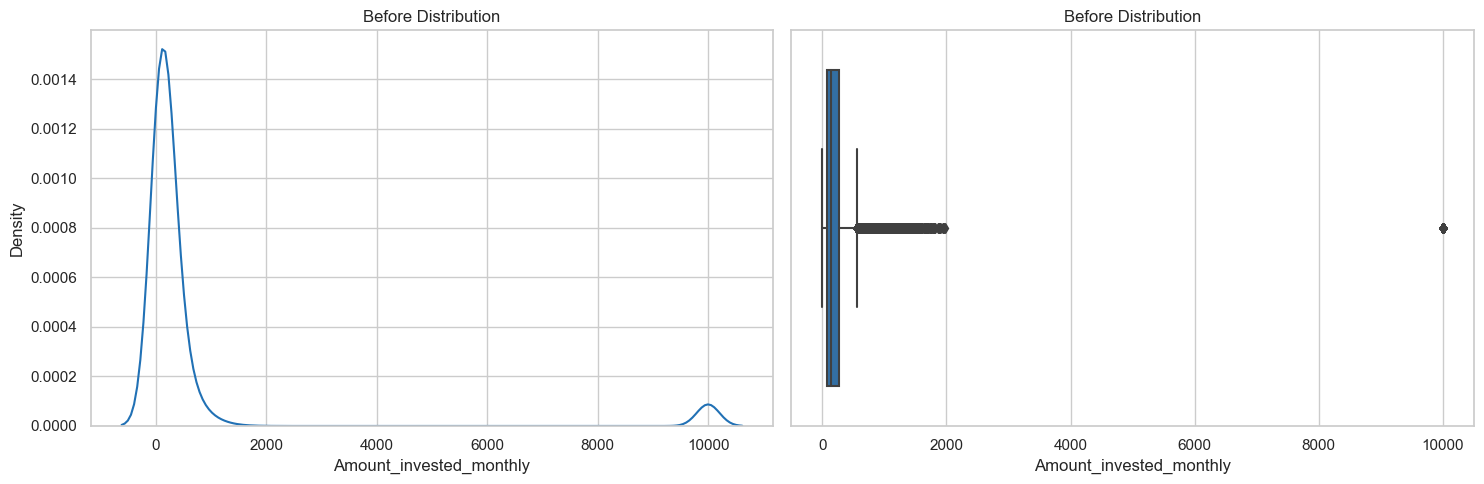

In [71]:
#Amount_invested_monthly
Distribution2(columne='Amount_invested_monthly',data1=data1,i=0)


In [72]:
data1['Amount_invested_monthly']=data1.apply(get_Amount_invested_monthly,axis=1)


NameError: name 'get_Amount_invested_monthly' is not defined

In [73]:
print(data1[data1['Amount_invested_monthly']>=1000].shape)
data1=data1[data1['Amount_invested_monthly']<1000]

(3766, 27)


In [74]:
data1.shape


(68366, 27)

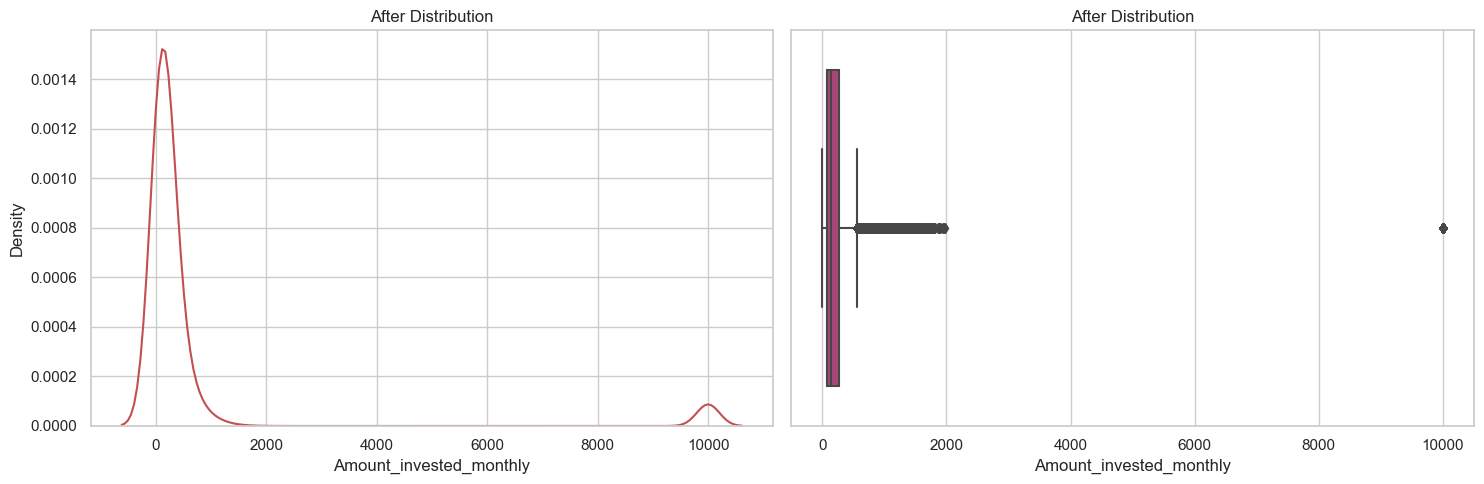

In [75]:
Distribution2(columne='Amount_invested_monthly',data1=data1,i=1)


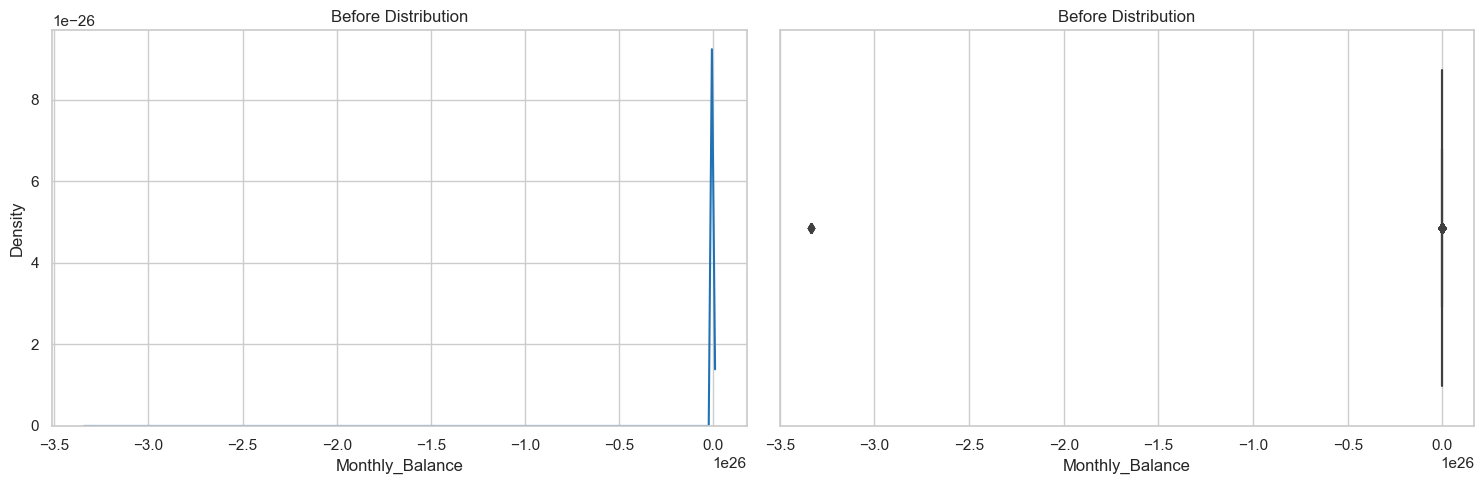

In [76]:
#Monthly balance
Distribution2(columne='Monthly_Balance',data1=data1,i=0)


In [77]:
def get_Monthly_Balance(row):
    if pd.isnull(row['Monthly_Balance']):
        Monthly_Balance=(data1[data1['Customer_ID']==row['Customer_ID']]['Monthly_Balance'].dropna()).mode()
        try:
            return Monthly_Balance[0]
        except:
            return np.NaN
    else:
        return row['Monthly_Balance']

In [78]:
data1['Monthly_Balance']=data1.apply(get_Monthly_Balance,axis=1)


In [79]:
print(data1[data1['Monthly_Balance'] <= 0].shape)
data1 = data1[data1['Monthly_Balance'] > 0]

(7, 27)


In [80]:
data1.shape


(68359, 27)

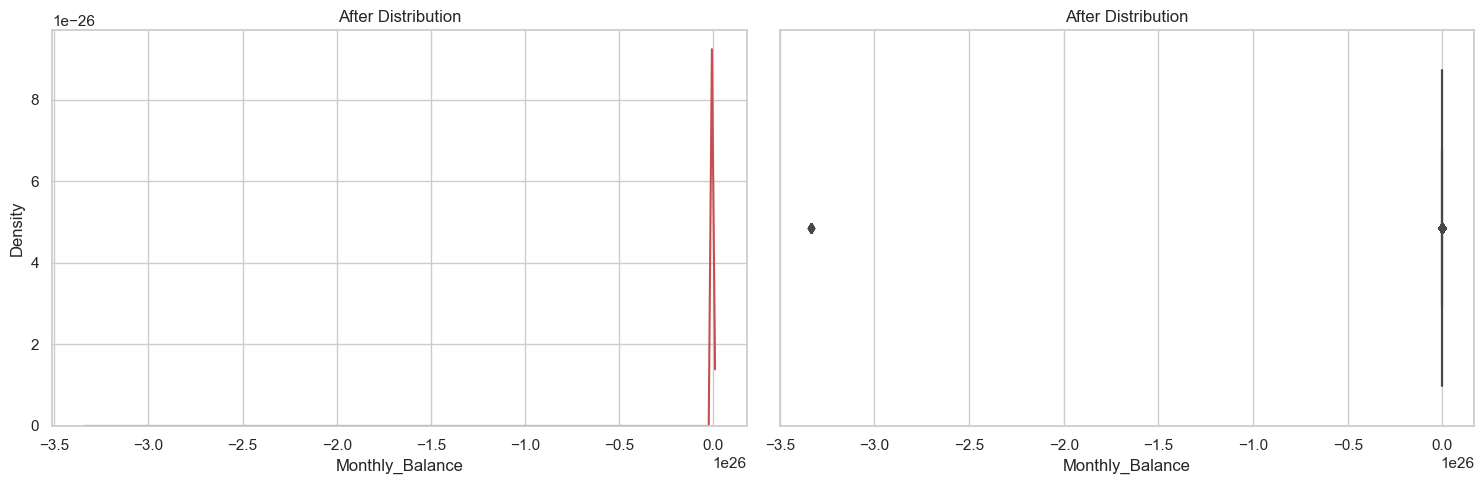

In [81]:
Distribution2(columne='Monthly_Balance',data1=data1,i=1)


In [82]:
missing_columns=data1.isnull().sum()
miss_num_columns = list(data1[(missing_columns[missing_columns > 0]).index].select_dtypes(include=["int64","float64"]).columns)
miss_num_columns

[]

In [83]:
columns_with_missing_values(data1)


Name                  6865
Occupation            4804
Type_of_Loan          7624
Credit_Mix           13867
Payment_Behaviour     5142
dtype: int64

In [84]:
miss_object_columns=list(data[(missing_columns[missing_columns > 0]).index].select_dtypes(include='object').columns)
miss_object_columns

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']

In [85]:
# Occupation
def get_Occupation(row):
    if pd.isnull(row['Occupation']):
        Occupation=(data1[data1['Customer_ID']==row['Customer_ID']]['Occupation'].dropna()).mode()
        try:
            return Occupation[0]
        except:
            return np.NaN
    else:
        return row['Occupation']

In [86]:
data1['Occupation']=data1.apply(get_Occupation,axis=1)


In [87]:
data1[data1['Occupation'].isnull()]


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
93280,145554,40551,January,Marias,24,NaN,44393.86,3504.488333,6,3,...,NaN,1270.97,37.328326,245.0,Yes,63.794335,91.470434,High_spent_Medium_value_payments,445.184064,Standard
93282,145556,40551,March,Marias,24,NaN,44393.86,3504.488333,6,3,...,NaN,1270.97,29.115904,245.0,Yes,63.794335,73.100761,High_spent_Medium_value_payments,463.553737,Standard
93283,145557,40551,April,Marias,24,NaN,44393.86,3504.488333,6,3,...,NaN,1270.97,27.476836,245.0,Yes,63.794335,218.849479,Low_spent_Small_value_payments,357.805019,Standard
93284,145558,40551,May,NaN,24,NaN,44393.86,3504.488333,6,3,...,Standard,1270.97,25.366794,247.0,Yes,63.794335,129.964789,Low_spent_Large_value_payments,426.689709,Poor
93286,145560,40551,July,Marias,24,NaN,44393.86,3504.488333,6,3,...,Standard,1270.97,33.895918,249.0,Yes,63.794335,430.171729,Low_spent_Small_value_payments,146.482769,Poor
96211,149949,46570,April,David Millikenw,28,NaN,30628.83,2326.402500,4,5,...,Standard,181.03,31.694185,146.0,Yes,45.328475,62.434608,High_spent_Medium_value_payments,374.877167,Good


In [88]:
data1['Occupation'] = data1['Occupation'].fillna(data['Occupation'].mode()[0])


In [89]:
len(data1[data1['Occupation'].isnull()])


0

In [90]:
#Type_of_Loan
data1['Type_of_Loan'] = data1['Type_of_Loan'].fillna('Not Specified')


In [91]:
def get_Diff_Values_Colum(df_data):
    valu=['Auto Loan','Credit-Builder Loan','Debt Consolidation Loan','Home Equity Loan','Mortgage Loan','Not Specified',
          'Payday Loan','Personal Loan','Student Loan']
    for x in valu:
        df_data[x] = np.NAN
        
    index=0
    for i in df_data['Type_of_Loan']:
        diff_value=[]
        if  ',' not in i:
            diff_value.append(i.strip())
        else:
            for data in map(lambda x:x.strip(), i.replace('and','').split(',')):
                if not data in diff_value:
                    diff_value.append(data)
        
        for x in valu:
            if x in diff_value:
                df_data[x].iloc[index]=1
        index=index+1
        
    for x in valu:
        df_data[x] = df_data[x].fillna(0)
        df_data[x] = df_data[x].astype(int) 
    return df_data

data1=get_Diff_Values_Colum(data1)

In [92]:
data1.drop('Type_of_Loan',axis=1,inplace=True)


In [93]:
data1.head(2)

,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0
6,5640,3392,July,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0


In [94]:
#Credit Mix
def get_Credit_Mix(row):
    if pd.isnull(row['Credit_Mix']):
        Credit_Mix=(data1[data1['Customer_ID']==row['Customer_ID']]['Credit_Mix'].dropna()).mode()
        try:
            return Credit_Mix[0]
        except:
            return np.NaN
    else:
        return row['Credit_Mix']

In [95]:
data1['Credit_Mix']=data1.apply(get_Credit_Mix,axis=1)


In [96]:
data1['Credit_Mix'] = data1['Credit_Mix'].fillna(data1['Credit_Mix'].mode()[0])


In [97]:
len(data1[data1['Credit_Mix'].isnull()])


0

In [98]:
#Payment Behavior
def get_Payment_Behaviour(row):
    if pd.isnull(row['Payment_Behaviour']):
        Payment_Behaviour=(data1[data1['Customer_ID']==row['Customer_ID']]['Payment_Behaviour'].dropna()).mode()
        try:
            return Payment_Behaviour[0]
        except:
            return np.NaN
    else:
        return row['Payment_Behaviour']

In [99]:
data1['Payment_Behaviour']=data1.apply(get_Payment_Behaviour,axis=1)


In [100]:
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].fillna(data1['Payment_Behaviour'].mode()[0])


In [101]:
len(data1[data1['Payment_Behaviour'].isnull()])


0

In [102]:
columns_with_missing_values(data1)


Name    6865
dtype: int64

In [103]:
num_columns = list(data1.select_dtypes(include=["int64","float64",'int32']).columns)
num_columns=num_columns[2:-9]

In [104]:
process=['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
         'Credit_History_Age','Amount_invested_monthly','Monthly_Balance']

In [105]:
for i in num_columns:
    if i not in process:
        print(i)

Age
Annual_Income
Num_Bank_Accounts
Num_Credit_Card
Interest_Rate
Num_of_Loan
Delay_from_due_date
Outstanding_Debt
Credit_Utilization_Ratio
Total_EMI_per_month


In [106]:
#AGE

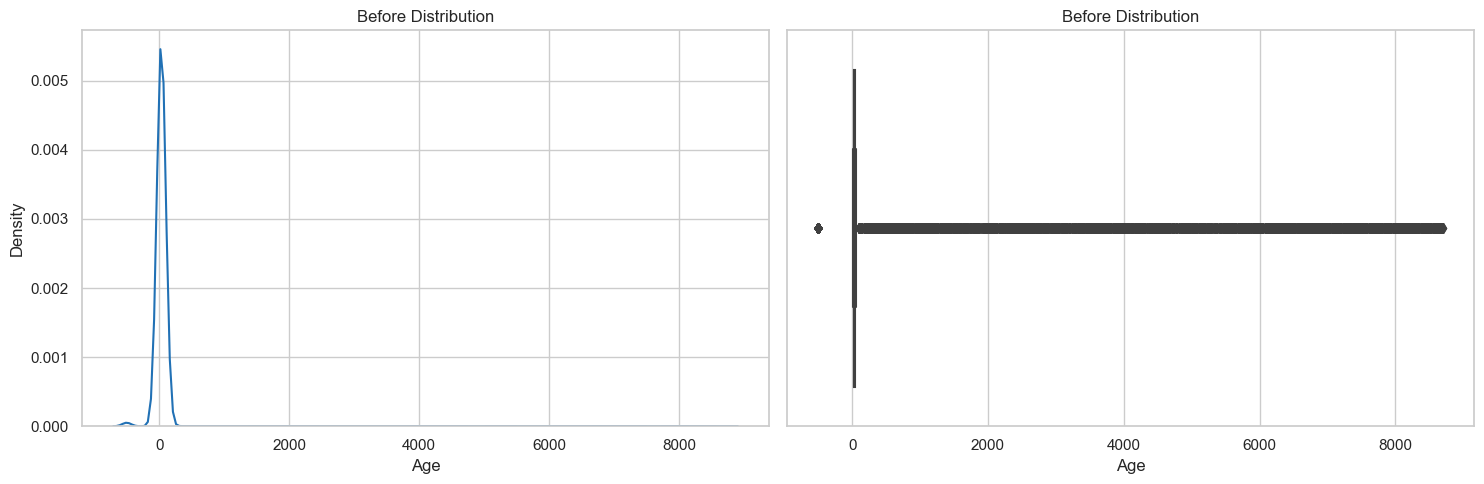

In [107]:
Distribution2(columne='Age',data1=data1,i=0)


In [108]:
print(data1[data1['Age'] > 60].shape)


(1292, 35)


In [109]:
def get_age(row):
    if (60 < row['Age']) or (0 > row['Age']) :
        Age=(data1[data1['Customer_ID']==row['Customer_ID']]['Age'].dropna()).mode()
        try:
            return Age[0]
        except:
            return np.NaN
    else:
        return row['Age']

In [110]:
data1['Age']=data1.apply(get_age,axis=1)


In [111]:
data1[data1['Age'] > 60].sort_values('Age')


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
1238,7488,6806,July,Sinead Carewi,5112,Media_Manager,28681.38,2127.115,1338,5,...,Good,0,0,0,0,0,1,0,0,0


In [112]:
data1.drop(data1[data1['Age'] > 60].index,axis=0,inplace=True)


In [113]:
data1[data1['Age'] < 0].sort_values('Age')


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
12817,24859,40444,February,Paul Taylorf,-500,Mechanic,96148.05,7875.337500,4,5,...,Standard,0,0,0,1,0,1,0,0,1
86204,134938,15485,May,Carolinet,-500,Engineer,135671.32,11395.943333,4,5,...,Good,0,1,0,0,1,1,1,0,0
79807,125341,39057,August,Veronica Ekn,-500,Developer,62896.78,5323.398333,3,5,...,Good,0,0,1,0,0,0,0,0,0
79804,125338,39057,May,Veronica Ekn,-500,Developer,62896.78,5323.398333,3,5,...,Good,0,0,1,0,0,0,0,0,0
79801,125335,39057,February,Veronica Ekn,-500,Developer,62896.78,5323.398333,3,5,...,Good,0,0,1,0,0,0,0,0,0
78784,123810,33230,January,Jennifer Sabal,-500,Accountant,20579.45,1814.954167,5,6,...,Poor,0,0,0,0,0,1,0,0,0
67732,107230,7217,May,Siebelti,-500,Musician,29669.28,2534.440000,7,9,...,Poor,1,1,0,0,1,1,1,1,0
55141,88343,16350,June,NaN,-500,Scientist,32033.29,2674.440833,5,3,...,Standard,0,1,0,1,0,1,0,0,0
54259,87021,28508,April,riai,-500,Developer,41810.59,3231.215833,0,5,...,Good,0,0,1,0,1,1,0,0,0
90832,141882,16752,January,Martinne Gellerp,-500,Writer,23336.97,1744.747500,3,673,...,Standard,0,0,0,1,0,0,0,0,0


In [114]:
data1.drop(data1[data['Age']  < 0].index,axis=0,inplace=True)


In [115]:
len(data1[data1['Age'].isnull()])


0

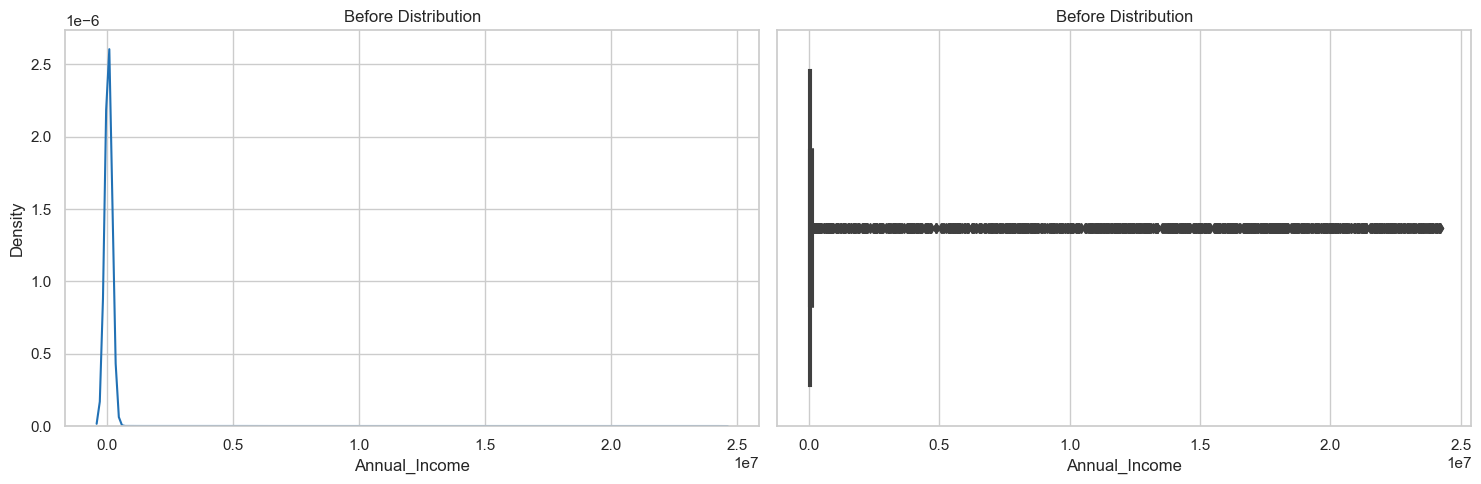

In [116]:
#Annual Income
Distribution2(columne='Annual_Income',data1=data1,i=0)


In [117]:
def get_Annual_Income(row):
    if 150000 < row['Annual_Income'] :
        Annual_Income=(data1[data1['Customer_ID']==row['Customer_ID']]['Annual_Income'].dropna()).mode()
        try:
            return Annual_Income[0]
        except:
            return np.NaN
    else:
        return row['Annual_Income']

In [118]:
data1['Annual_Income']=data1.apply(get_Annual_Income,axis=1)


In [119]:
data1[data1['Annual_Income'] > 165000].sort_values('Annual_Income')


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
56581,90503,15769,June,NaN,46,Accountant,167258.04,12986.315524,5,2,...,Good,0,0,0,0,0,1,0,0,0
56582,90504,15769,July,Lionel Laurentb,46,Accountant,167258.04,12986.315524,566,2,...,Good,0,0,0,0,0,1,0,0,0
56583,90505,15769,August,Lionel Laurentb,46,Accountant,167258.04,12986.315524,5,1123,...,Good,0,0,0,0,0,1,0,0,0
36013,59651,21693,June,Nick Edwardsv,26,Journalist,167753.52,13102.045569,3,3,...,Good,0,0,0,0,1,1,0,1,0
35478,58848,41452,July,Danielr,51,Teacher,171292.56,12574.940065,1,5,...,Standard,1,0,1,0,0,0,1,0,0
9378,19700,13909,March,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,...,Poor,0,0,0,0,0,1,0,0,0
9379,19701,13909,April,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,...,Standard,0,0,0,0,0,1,0,0,0
9380,19702,13909,May,Ransdellw,29,Lawyer,177907.72,13078.430052,0,6,...,Standard,0,0,0,0,0,1,0,0,0
9381,19703,13909,June,Ransdellw,30,Lawyer,177907.72,13078.430052,0,6,...,Standard,0,0,0,0,0,1,0,0,0
9382,19704,13909,July,NaN,30,Lawyer,177907.72,13078.430052,0,6,...,Standard,0,0,0,0,0,1,0,0,0


In [120]:
data1.drop(data1[data1['Annual_Income']  > 165000].index,axis=0,inplace=True)


In [121]:
#Num_Bank_Accounts


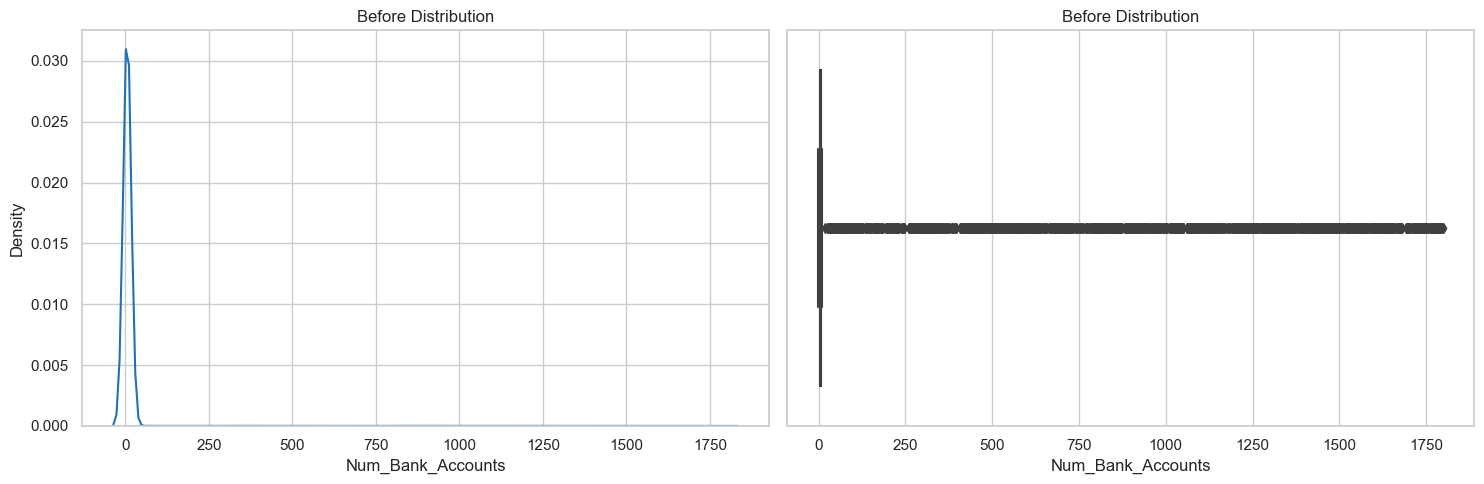

In [122]:
Distribution2(columne='Num_Bank_Accounts',data1=data1,i=0)


In [123]:
def get_Num_Bank_Accounts(row):
    if 12 < row['Num_Bank_Accounts'] :
        Num_Bank_Accounts=(data[data['Customer_ID']==row['Customer_ID']]['Num_Bank_Accounts'].dropna()).mode()
        try:
            return Num_Bank_Accounts[0]
        except:
            return np.NaN
    else:
        return row['Num_Bank_Accounts']

In [124]:
data1['Num_Bank_Accounts']=data1.apply(get_Num_Bank_Accounts,axis=1)


In [125]:
data1[data1['Num_Bank_Accounts'] > 12]


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan


In [126]:
data1.drop(data1[data1['Num_Bank_Accounts']  > 12].index,axis=0,inplace=True)
data1.drop(data1[data1['Num_Bank_Accounts']  < 0].index,axis=0,inplace=True)

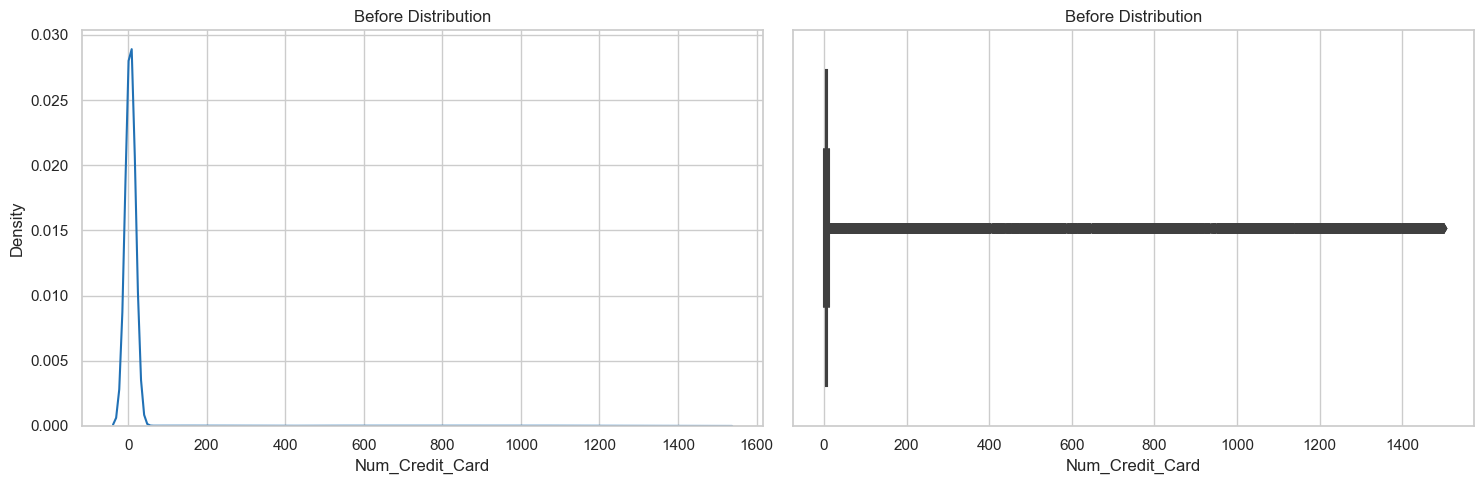

In [127]:
#Num_Credit_Card
Distribution2(columne='Num_Credit_Card',data1=data1,i=0)



In [128]:
data1[data1['Num_Credit_Card'] > 14]


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
157,5867,16640,June,Reema,32,Entrepreneur,19300.34,1512.361667,6,1029,...,Poor,1,0,1,0,1,1,1,0,0
163,5877,4911,April,NaN,41,Musician,19514.88,1828.240000,7,488,...,Poor,0,0,0,0,0,1,0,0,0
207,5941,19779,August,Reijik,48,Entrepreneur,20787.69,1999.307500,8,1381,...,Standard,0,1,0,1,0,0,0,0,0
280,6054,39828,January,Bri,36,Manager,71681.40,5799.450000,3,518,...,Standard,0,0,0,0,0,1,0,0,0
520,6414,23775,January,Wohli,17,Musician,75273.24,6552.770000,8,943,...,Standard,0,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99592,155022,38110,January,NaN,36,Writer,61167.90,4912.325000,3,1300,...,Good,0,0,0,1,1,0,1,0,0
99605,155039,23917,June,Martinb,38,Writer,126514.72,10341.893333,8,1255,...,Good,1,1,0,1,0,0,0,0,0
99611,155049,10281,April,Alistair Barre,31,Journalist,64901.37,5298.447500,3,514,...,Standard,0,0,0,0,0,1,0,0,0
99619,155061,44646,April,Jino,30,Writer,142560.36,11773.030000,6,1430,...,Standard,0,0,0,0,0,0,0,0,1


In [129]:
def get_Num_Credit_Card(row):
    if 14 < row['Num_Credit_Card'] :
        Num_Credit_Card=(data1[data1['Customer_ID']==row['Customer_ID']]['Num_Credit_Card'].dropna()).mode()
        try:
            return Num_Credit_Card[0]
        except:
            return np.NaN
    else:
        return row['Num_Credit_Card']

In [130]:
data1['Num_Credit_Card']=data1.apply(get_Num_Credit_Card,axis=1)


In [131]:
data1.drop(data1[data1['Num_Credit_Card']  > 14].index,axis=0,inplace=True)


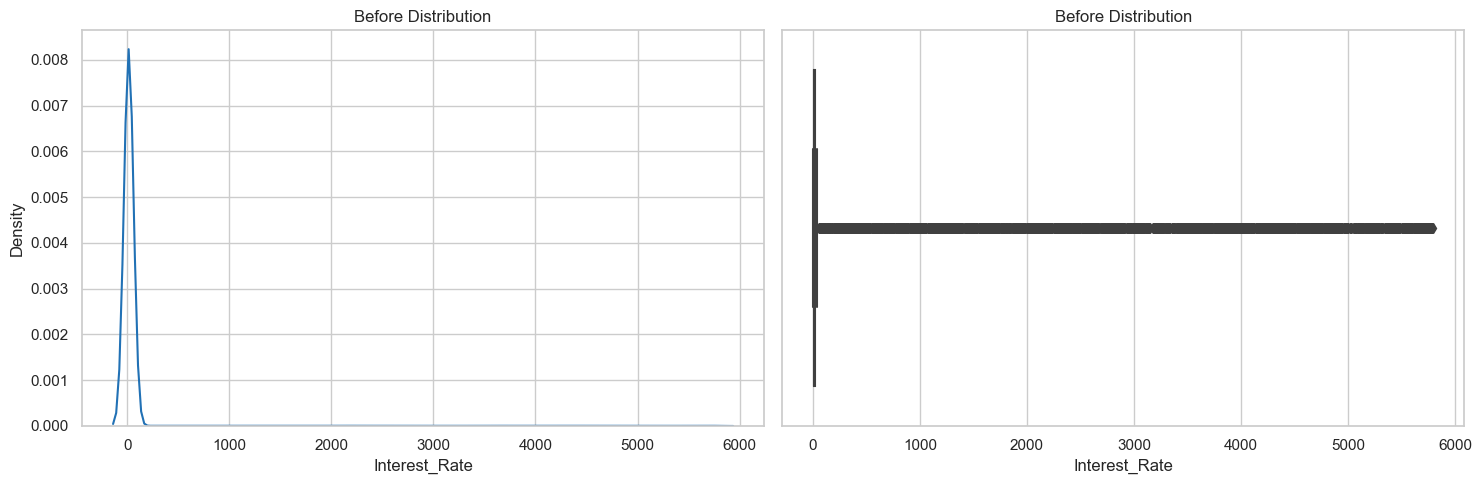

In [132]:
#Interest Rate
Distribution2(columne='Interest_Rate',data1=data1,i=0)


In [133]:
data1[data1['Interest_Rate'] > 35].sort_values('Interest_Rate')


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
35442,58796,24464,March,NaN,15,Engineer,12680.815,1334.734583,4,5,...,Standard,0,0,0,0,0,1,0,0,0
57905,92491,24226,February,Julien Toyerf,36,Entrepreneur,17869.290,1643.107500,6,3,...,Standard,1,0,0,0,0,1,1,0,0
61480,97854,28633,January,Julien Toyerq,35,Journalist,84050.500,7140.208333,3,5,...,Good,0,0,0,1,0,0,0,0,1
2648,9606,30096,January,Malathi Nayakw,43,Architect,68665.760,5619.146667,7,6,...,Standard,0,1,0,1,1,0,1,1,1
17432,31782,50433,January,Melanie Leey,27,Lawyer,23454.090,2211.507500,5,5,...,Standard,1,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86815,135853,10886,August,Lesleyk,36,Accountant,50817.900,4531.825000,3,6,...,Poor,0,0,0,1,0,0,0,0,1
77710,122196,9668,July,Zieminskia,40,Accountant,14717.280,1069.440000,5,2,...,Standard,0,0,0,1,0,0,0,0,1
88505,138391,6568,February,NaN,42,Musician,30683.420,2397.951667,4,6,...,Standard,0,0,1,0,0,1,0,0,0
23512,40902,12203,January,Anna Yukhananovd,26,Manager,75804.940,6120.078333,0,1,...,Good,0,1,0,1,1,0,0,0,0


In [134]:
def get_Interest_Rate(row):
    if 35 < row['Interest_Rate'] :
        Interest_Rate=(data1[data1['Customer_ID']==row['Customer_ID']]['Interest_Rate'].dropna()).mode()
        try:
            return Interest_Rate[0]
        except:
            return np.NaN
    else:
        return row['Interest_Rate']

In [135]:
data1['Interest_Rate']=data1.apply(get_Interest_Rate,axis=1)


In [136]:
#Num_of_Loan

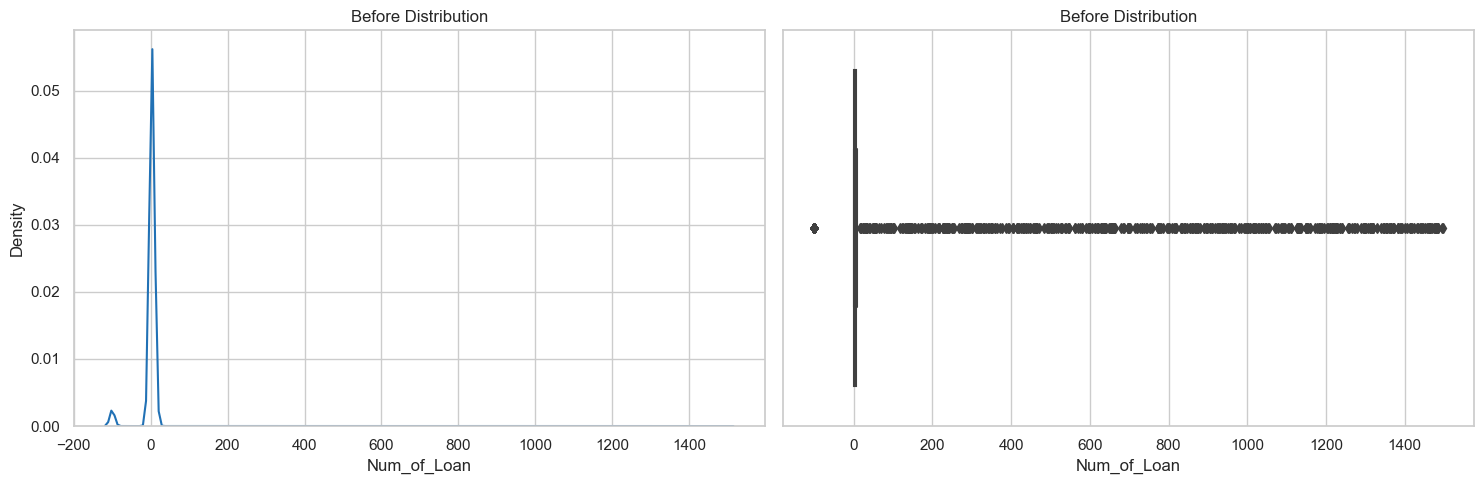

In [137]:
Distribution2(columne='Num_of_Loan',data1=data1,i=0)


In [138]:
def get_Num_of_Loan(row):
    if (8 < row['Num_of_Loan']) or (0 > row['Num_of_Loan']):
        Num_of_Loan=(data1[data1['Customer_ID']==row['Customer_ID']]['Num_of_Loan'].dropna()).mode()
        try:
            return Num_of_Loan[0]
        except:
            return np.NaN
    else:
        return row['Num_of_Loan']

In [139]:
data1['Num_of_Loan']=data1.apply(get_Num_of_Loan,axis=1)


In [140]:
data1.drop(data1[data1['Num_of_Loan']  < 0].index,axis=0,inplace=True)


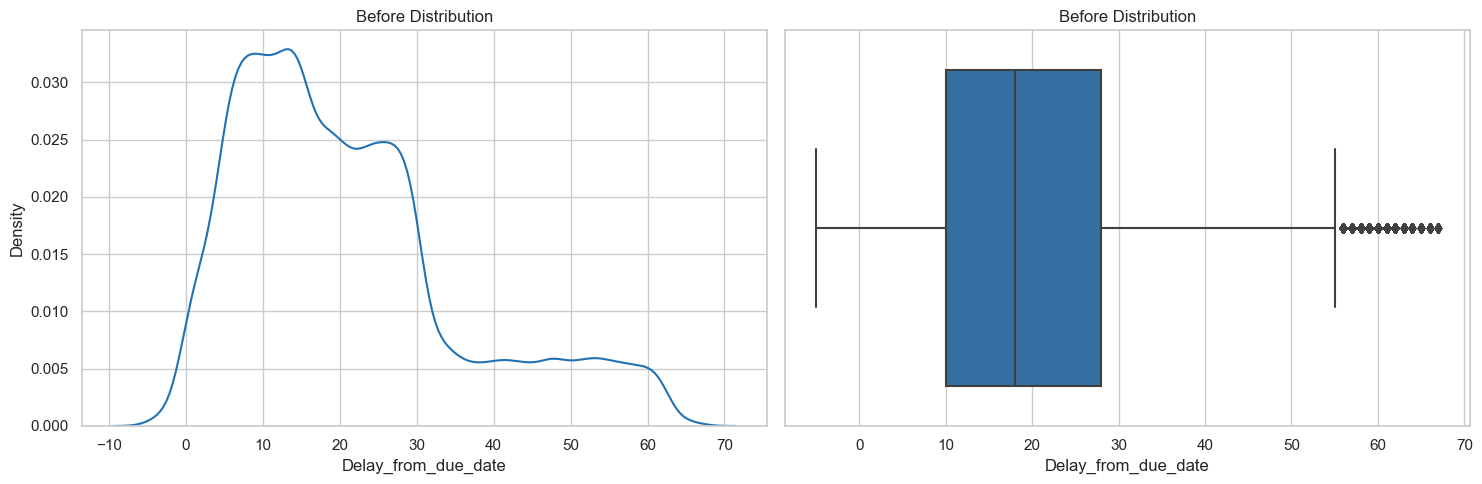

In [141]:
#delay from due date
Distribution2(columne='Delay_from_due_date',data1=data1,i=0)


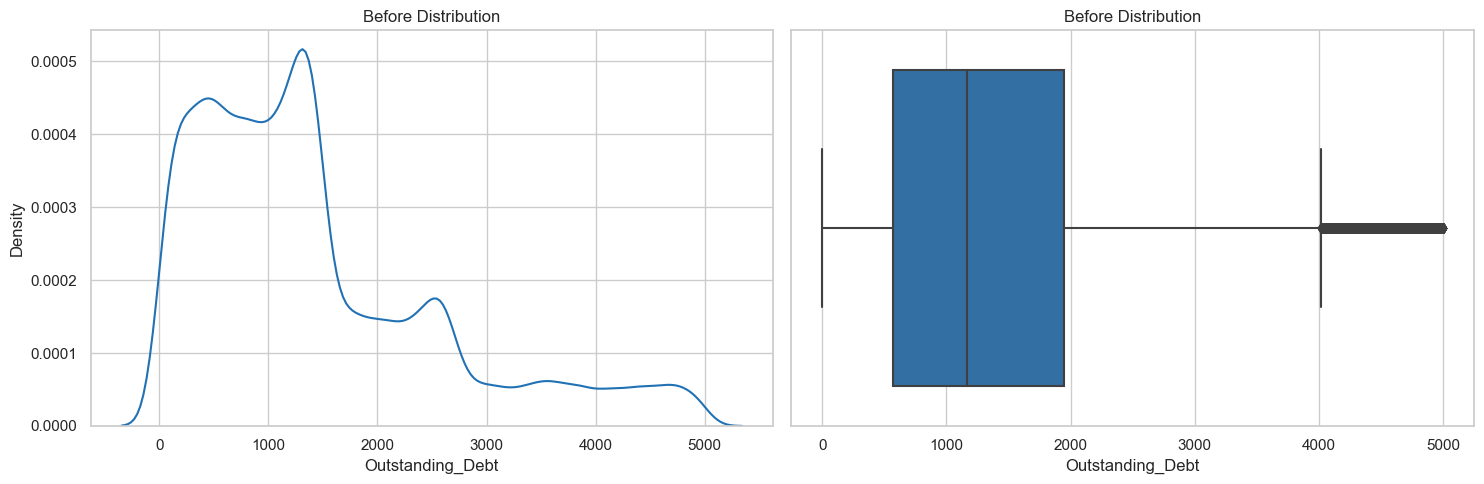

In [142]:
#Outstanding_debt
Distribution2(columne='Outstanding_Debt',data1=data1,i=0)


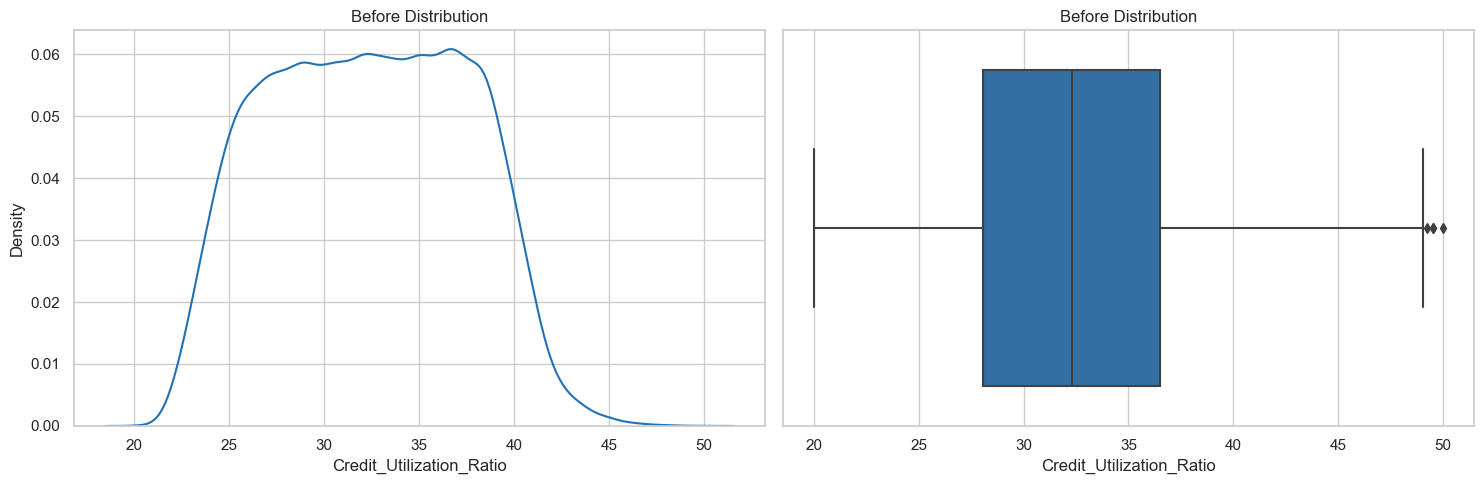

In [143]:
#Credit_Utilitzation_ratio
Distribution2(columne='Credit_Utilization_Ratio',data1=data1,i=0)


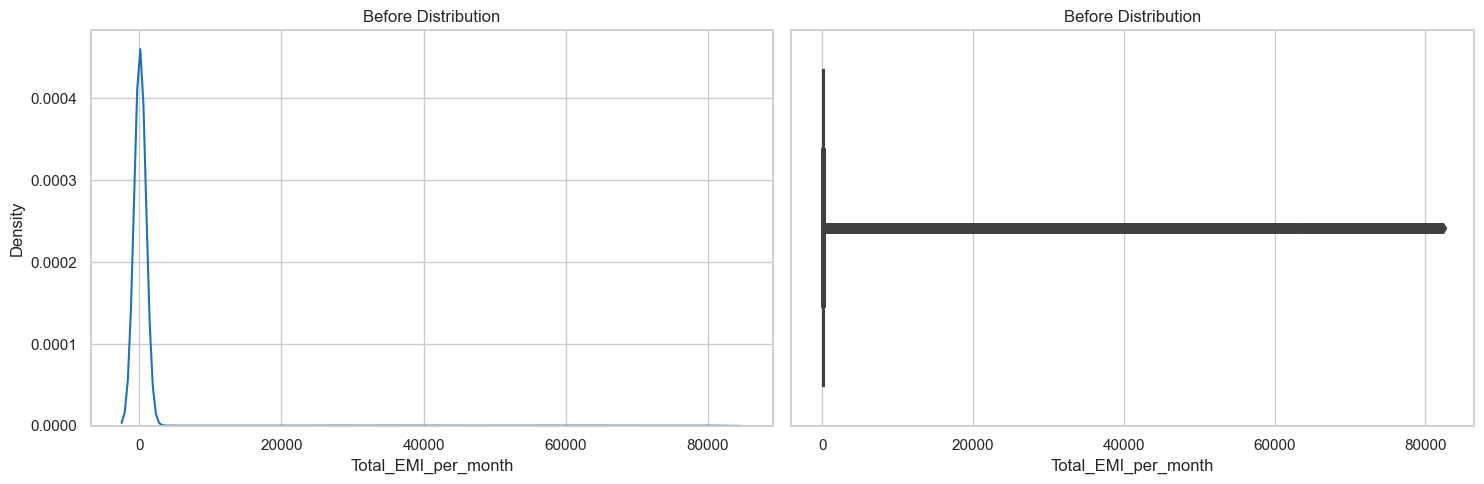

In [144]:
#Total_emi_Per_month
Distribution2(columne='Total_EMI_per_month',data1=data1,i=0)


In [145]:
data1=data1[data1['Total_EMI_per_month']<5000]


In [146]:
data1.shape


(65599, 35)

In [147]:
#Save process DATA to CSV

data1.head(3)


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0
6,5640,3392,July,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0
7,5641,3392,August,NaN,23,Scientist,19114.12,1824.843333,3,4,...,Standard,1,1,0,1,0,0,0,1,0


In [148]:
data1.to_csv("./bank_data.csv", index=False)


In [149]:
process_df= pd.read_csv("./bank_data.csv",sep = "," , encoding = "utf-8")


In [150]:
process_df.head(3)


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,5634,3392,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0
1,5640,3392,July,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,Good,1,1,0,1,0,0,0,1,0
2,5641,3392,August,NaN,23,Scientist,19114.12,1824.843333,3,4,...,Standard,1,1,0,1,0,0,0,1,0


In [154]:
#Drop unimportant columns

In [151]:
def drop_columns(DataFrame):
    lazy_list=['ID','Customer_ID','Name']
    DataFrame.drop(lazy_list, axis=1, inplace=True)
drop_columns(process_df)

In [153]:
#Encode categorical variables

In [152]:
process_df['Month'] = process_df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [155]:
Occupation_le = LabelEncoder()

process_df['Occupation'] = Occupation_le.fit_transform(process_df['Occupation'])
Occupation_le.classes_

array(['Accountant', 'Architect', 'Developer', 'Doctor', 'Engineer',
       'Entrepreneur', 'Journalist', 'Lawyer', 'Manager', 'Mechanic',
       'Media_Manager', 'Musician', 'Scientist', 'Teacher', 'Writer'],
      dtype=object)

In [156]:
Credit_Mix_le = LabelEncoder()

process_df['Credit_Mix'] = Credit_Mix_le.fit_transform(process_df['Credit_Mix'])
Credit_Mix_le.classes_

array(['Bad', 'Good', 'Standard'], dtype=object)

In [157]:
Payment_Behaviour_le = LabelEncoder()

process_df['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(process_df['Payment_Behaviour'])
Payment_Behaviour_le.classes_

array(['High_spent_Large_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments'], dtype=object)

In [158]:
Payment_of_Min_Amount_le = LabelEncoder()

process_df['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(process_df['Payment_of_Min_Amount'])
Payment_of_Min_Amount_le.classes_

array(['NM', 'No', 'Yes'], dtype=object)

In [160]:
#Splitting the data

In [159]:
x = process_df.drop('Credit_Score',axis=1)
y = process_df['Credit_Score']

In [161]:
y_le = LabelEncoder()

y_Encode = y_le.fit_transform(y)
y_le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [162]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [163]:
pca = PCA(n_components=0.98)
x_reduced = pca.fit_transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

Number of original features is 31 and of reduced features is 21


In [164]:
#MODEL

In [165]:
evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_accuracy, test_accuracy]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Poor', 'Standard','Good'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [168]:
#Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression


In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state = 1234)
lr = LogisticRegression(C = 100)
lr.fit(x_train , y_train)


LogisticRegression(C=100)

In [170]:
lr_score_train=lr.score(x_train , y_train)
lr_score_train

0.6541083211742416

In [171]:
lr_score_test=lr.score(x_test , y_test)
lr_score_test

0.6463414634146342

Training Accuracy Logistic Regression 65.41083211742415  Test Accuracy Logistic Regression 64.63414634146342


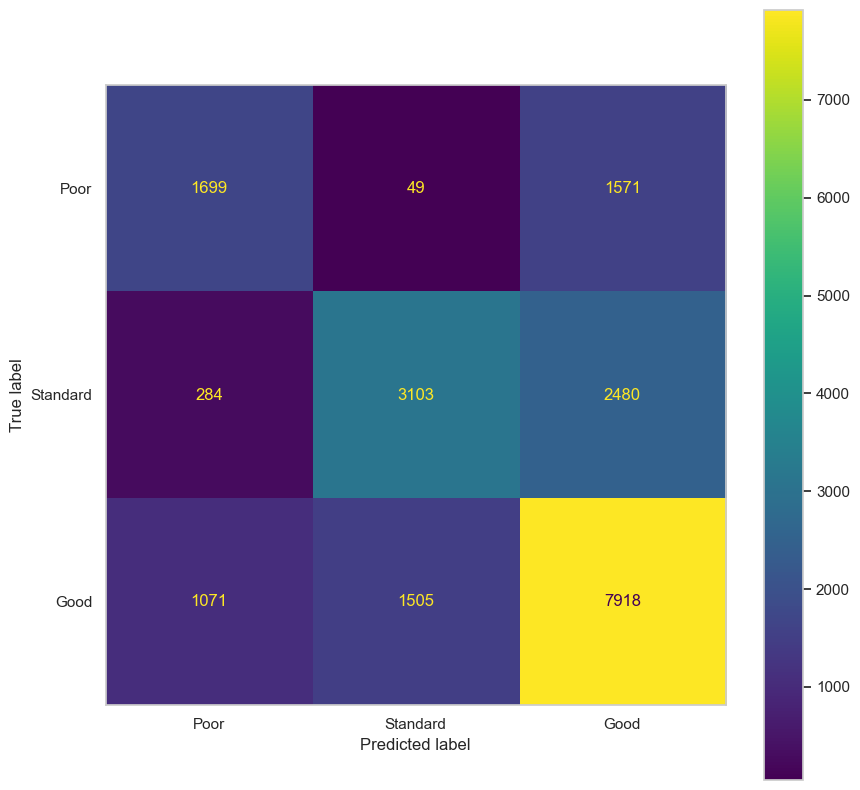

In [172]:
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)
